In [1]:
# the purpose of this function is to take a TSP formatted file as specicfied by the
#   assignment and return a list of all the cities and their coordanites in an array
#   called arr.  
#  arr[i] will be the ith city.  
#  arr[i][0] will be the name of the ith city (ex. arr[0][0] == 'A')
#  arr[i][1] will be the x coord of the ith city
#  arr[i][2] will be the x coord of the ith city
def getVerteciesTSP(filepath):
    Arr = []
    first = True
    lines = open(filepath, "r")
    n = int(lines.readline())
    arr = [[]]*n
    for i in range(n) :
        line = lines.readline()
        words = line.split()
        j = 0
        city = ['label', 0, 0]
        for word in words:
            if(j == 0) :
                city[j] = word
            else :
                city[j]= int(word)
            j+=1
        arr[i] = city
    return arr

# return the euclidean distance of two points
def dist(a, b):
    return ((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)**0.5

import heapq as hq

def a_star(path):
    nodeCount = 0
    V = getVerteciesTSP(path)
    n = len(V)
    # start state is 2000...
    start = '2' + '0' * (n-1)
    # goal state is 2111...
    goal = '2' + '1' * (n-1)
    
    # in this algorithm, we are not going to dierectly look for the goal state.
    # rather, we are going to look for a state where all cities are visitied and 
    # we just need to get back to start.  we will then do the final calulation to
    # get to the goal.  ex (111...2...111) -> (2111...)
    
    # priority Q to keep track of which node we will expland next
    frontier = []
    
    # cost_so_far is a dictionary that will map a state to the 
    # minimum cost path to get to that state
    cost_so_far = {}
    cost_so_far[start] = 0
    
    # when we add our state onto the fronteir, we also add a second integer i.  i is the
    # position of the 2 in s of the state. i.e. where the salesman is
    hq.heappush(frontier, (0, [start, 0]))
    
    while (frontier):
        # here is where we are expanding nodes.  so we pop the lowest priority
        # node and increment the nodeCount
        current = hq.heappop(frontier)[1]
        nodeCount += 1
        endCheck = True
        at = current[1]
        for i in range(n) :
            if(current[0][i] == '0') :
                # since we found a city that was not yet visited, we will, set
                # endcheck to false.
                endCheck = False
                
                # we nhave found a city that the salesman must visit, so we will
                # create a state that corresponds to this, as well as a new cost
                # for getting to this state
                new_cost = cost_so_far[current[0]] + dist(V[at][1:3], V[i][1:3]) 
                # first mark this location as 2 since the salesman i now here
                new_state = str(current[0][0:i]) + "2" + str(current[0][i+1:])
                # change where the salesman was from 2 to 1 since he moved
                new_state = str(new_state[0:at]) + "1" + str(new_state[at+1:])
                # we will only update cost_so_far[new_state] if it is the minimum cost
                # or we have not discovered this state yet
                if (new_state not in cost_so_far or new_cost < cost_so_far[new_state]):
                    cost_so_far[new_state] = new_cost
                    # our heuristic is calculate the distance from the current city
                    #  to the start/goal city
                    heuristic = dist(V[0][1:3], V[current[1]][1:3])
                    priority = new_cost + heuristic
                    hq.heappush(frontier, (priority, [new_state, i]))
        
        
        # this is the case where the saleman has been everywhere, and just needs to
        #  return to start from his current position
        if (endCheck):
            new_cost = cost_so_far[current[0]] + dist(V[at][1:3], V[0][1:3])
            new_state = "result"
            # we will add the final state "result" to cost so far if it was not
            #  was not explored yet, otherwise, if we have found a cheaper tour,
            #  update the result
            if (new_state not in cost_so_far or new_cost < cost_so_far[new_state]):
                cost_so_far[new_state] = new_cost
    # we are interested in the total number of nodes we have expanded as well as the cost of the optimal path
    return nodeCount, cost_so_far["result"]

#this function is the same as A* but, we removed the heuristic
def hEqualsZero(path):
    nodeCount = 0
    V = getVerteciesTSP(path)
    n = len(V)
    # start state is 2000...
    start = '2' + '0' * (n-1)
    # goal state is 2111...
    goal = '2' + '1' * (n-1)
    
    # in this algorithm, we are not going to dierectly look for the goal state.
    # rather, we are going to look for a state where all cities are visitied and 
    # we just need to get back to start.  we will then do the final calulation to
    # get to the goal.  ex (111...2...111) -> (2111...)
    
    # priority Q to keep track of which node we will expland next
    frontier = []
    
    # cost_so_far is a dictionary that will map a state to the 
    # minimum cost path to get to that state
    cost_so_far = {}
    cost_so_far[start] = 0
    
    # when we add our state onto the fronteir, we also add a second integer i.  i is the
    # position of the 2 in s of the state. i.e. where the salesman is
    hq.heappush(frontier, (0, [start, 0]))
    
    while (frontier):
        # here is where we are expanding nodes.  so we pop the lowest priority
        # node and increment the nodeCount
        current = hq.heappop(frontier)[1]
        nodeCount += 1
        endCheck = True
        at = current[1]
        for i in range(n) :
            if(current[0][i] == '0') :
                # since we found a city that was not yet visited, we will, set
                # endcheck to false.
                endCheck = False
                
                # we nhave found a city that the salesman must visit, so we will
                # create a state that corresponds to this, as well as a new cost
                # for getting to this state
                new_cost = cost_so_far[current[0]] + dist(V[at][1:3], V[i][1:3]) 
                # first mark this location as 2 since the salesman i now here
                new_state = str(current[0][0:i]) + "2" + str(current[0][i+1:])
                # change where the salesman was from 2 to 1 since he moved
                new_state = str(new_state[0:at]) + "1" + str(new_state[at+1:])
                # we will only update cost_so_far[new_state] if it is the minimum cost
                # or we have not discovered this state yet
                if (new_state not in cost_so_far or new_cost < cost_so_far[new_state]):
                    cost_so_far[new_state] = new_cost
                    # no heuristic this time
                    priority = new_cost 
                    hq.heappush(frontier, (priority, [new_state, i]))
        
        
        # this is the case where the saleman has been everywhere, and just needs to
        #  return to start from his current position
        if (endCheck):
            new_cost = cost_so_far[current[0]] + dist(V[at][1:3], V[0][1:3])
            new_state = "result"
            # we will add the final state "result" to cost so far if it was not
            #  was not explored yet, otherwise, if we have found a cheaper tour,
            #  update the result
            if (new_state not in cost_so_far or new_cost < cost_so_far[new_state]):
                cost_so_far[new_state] = new_cost
    # we are interested in the total number of nodes we have expanded as well as the cost of the optimal path
    return nodeCount, cost_so_far["result"]


In [2]:
# run quick example
a_star("tsp_problems/16/instance_1.txt")

(585748, 404.0205022000922)

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

# this function runs A* on all of the files, and then groups them by size.
#   it returns an array "data" where data[i] = Average number of expanded nodes for 
#   all ths TSPs of size i that we ran A_star on
def getDataWithHTSP(path) :
    setNum = {}
    for i in range(1,17):
        setNum[str(i)] = 0
    first = os.listdir(path)
    for file in first:
        newPath = path + "/" +file
        second = os.listdir(newPath)
        l = len(newPath) + 1
        for file1 in second :
            finalPath = newPath + "/" + file1
            if(finalPath[l] != '.' ) :
                s = finalPath[13:15]
                if(s[1] == '/') :
                    s = s[0]
                a = a_star(finalPath)
                setNum[s] += a[0]
    data = [0] * 17
    for i in setNum:
        data[int(i)] = setNum[i]/10.0 
    return data

# this function runs A* on all of the files, and then groups them by size.
#   it returns an array "data" where data[i] = Average number of expanded nodes for 
#   all ths TSPs of size i that we ran A_star on
def getDataWithoutHTSP(path) :
    setNum = {}
    for i in range(1,17):
        setNum[str(i)] = 0
    first = os.listdir(path)
    for file in first:
        newPath = path + "/" +file
        second = os.listdir(newPath)
        l = len(newPath) + 1
        for file1 in second :
            finalPath = newPath + "/" + file1
            if(finalPath[l] != '.' ) :
                s = finalPath[13:15]
                if(s[1] == '/') :
                    s = s[0]
                a = hEqualsZero(finalPath)
                setNum[s] += a[0]
    data = [0] * 17
    for i in setNum:
        data[int(i)] = setNum[i]/10.0 
    return data
    

In [4]:
# this took me about 5 min to run since it does all of the test together

dataWH = getDataWithHTSP("tsp_problems")

In [5]:
# this will show a plot of average number of expanded nodes on the y-axis (logarithmic) 
# and the size of the TSP problems on the x-axis
# it then prints the slope of the line on the graph and the extrapolated number of nodes
# for a problem of size 36.
def analysis(data):
    plt.plot(data)
    plt.ylabel("Average # of nodes generated (log scaled)")
    plt.yscale('log')
    plt.xlabel("# of Cities")
    plt.title("Nodes Generated by A* VS. number of cites")
    plt.show()
    # now we are going to estimate the slope of the line of the plot
    # to get the most accurate measure for slope, we will take all of
    # pairs of poins in data, and take the slope, and then average all of those
    slopes = []
    for i in range(1,16):
        for j in range(i+1,16):
            slope = (np.log(data[j]) - np.log(data[i]))/(j - i)
            slopes.append(slope)
    theSlope = np.average(slopes)
    print("The slope of the line is : " + str(theSlope))
    print("So the expected number of expanded nodes is about 10^" + str(36*theSlope) + " for a TSP of size 36")

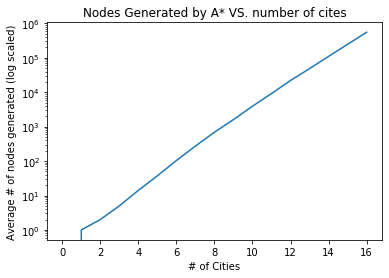

The slope of the line is : 0.9024020988188738
So the expected number of expanded nodes is about 10^32.48647555747946 for a TSP of size 36


In [6]:
# this took me about 5 min to run since it does all of the test together
# to the grader of the assignment.  Please forgive me <3
analysis(dataWH)

In [7]:
dataWOH = getDataWithoutHTSP("tsp_problems")

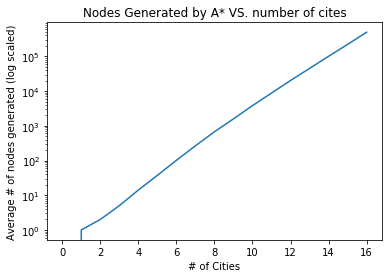

The slope of the line is : 0.8945487263107106
So the expected number of expanded nodes is about 10^32.20375414718558 for a TSP of size 36


In [8]:
analysis(dataWOH)